### Welcome to our Demonstration!

## Project 00
Generating a file to represent a bunch of particles

In [5]:
#import the necessary modules
import ipywidgets as widgets
from IPython.display import display
from PyParticleBunch import *

def generate_bunch():
    #Create the input fields to set the specifications of the particle bunch
    global BunchType
    BunchType = widgets.RadioButtons(
        options=['Uniform','Gaussian', 'Waterbag', 'KV', 'Poincare'],
        description='Bunch type:',
        disabled=False
    )
    display(BunchType)
    global Matched
    Matched = widgets.RadioButtons(
        options = ["Unmatched", "Matched"],
        description = "Matched?"
    )
    display(Matched)
    global TypeFileSave
    TypeFileSave = widgets.RadioButtons(
        options=['MADX','PTC', "Data file"],
        description='File type:',
        disabled=False
    )
    display(TypeFileSave)
    global DimensionsInput
    DimensionsInput = widgets.BoundedIntText(
        min=1,
        max=4,
        description='Dimensions:'
    )
    display(DimensionsInput)
    global NumOfParticles
    NumOfParticles = widgets.BoundedIntText(
        min=1,
        max=1000000,
        step = 1000,
        description='Particles:',
        value = 10000
    )
    display(NumOfParticles)
    global FileName
    FileName = widgets.Text(
        description='File Name:'
    )
    display(FileName)
    print("If you use the name of a pre-existing file, it will be overwritten.")
    print("An automatic file name will be assigned based on the bunch type and parameters if the name is left empty.")
    StartGen = widgets.Button(
    description = "start"
    )
    StartGen.on_click(on_button_clicked)
    display(StartGen)

def on_button_clicked(b):
    def onContinueButtonClicked(b):
        def BeginGen(BunchType, dimensions, matched, numParticles):
            #The generation functions for each type of particle bunch
            def generateUniform(dimensions, matched, numParticles):
                if dimensions == 1 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Uniform_1D(numParticles, MinLim.value, MaxLim.value, Horizontal.value)
                elif dimensions == 2 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Uniform_2D(numParticles, MinX.value, MaxX.value, MinY.value, MaxY.value)
                else:
                    print("Error - not viable option")
                    particleBunch = None
                return particleBunch
            def generateGaussian(dimensions, matched, numParticles):
                if dimensions == 4 and matched == "Matched":
                    particleBunch = ParticleBunch.MatchedGaussian_4D(numParticles, EmittanceX.value, EmittanceY.value, AlphaX.value, BetaX.value, AlphaY.value, BetaY.value, XLim.value, YLim.value)
                elif dimensions == 1 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Gaussian_1D(numParticles, stdDev.value, Mean.value, Coordinate.value)
                elif dimensions == 2 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Gaussian_2D(numParticles, Mean1.value, stdDev1.value, Mean2.value, stdDev2.value, Coordinate1.value, Coordinate2.value)
                elif dimensions == 4 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Gaussian_4D(numParticles, MeanX.value, stdDevX.value, MeanXp.value, stdDevXp.value, MeanY.value, stdDevY.value, MeanYp.value, stdDevYp.value)
                else:
                    print("Error - not viable option")
                    particleBunch = None
                return particleBunch

            def generateWaterbag(dimensions, matched, numParticles):
                if dimensions == 4 and matched == "Matched":
                    particleBunch = ParticleBunch.MatchedWaterbag_4D(numParticles, EmittanceX.value, EmittanceY.value, AlphaX.value, BetaX.value, AlphaY.value, BetaY.value)
                else:
                    print("Error - not viable option")
                    particleBunch = None
                return particleBunch
                    
            def generateKV(dimensions, matched, numParticles):
                if dimensions == 4 and matched == "Matched":
                    particleBunch = ParticleBunch.MatchedKV_4D(numParticles, EmittanceX.value, EmittanceY.value, AlphaX.value, BetaX.value, AlphaY.value, BetaY.value)
                else:
                    print("Error - not viable option")
                    particleBunch = None
                return particleBunch
                    
            def generatePoincare(dimensions, matched, numParticles):
                if dimensions == 1 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Poincare_1D(numParticles.value, Coordinate.value, Emittance.value, Alpha.value, Beta.value, MinSig.value, MaxSig.value, ClosedOrbit.value, Deltap.value, Dispersion.value)
                elif dimensions == 2 and matched == "Unmatched":
                    particleBunch = ParticleBunch.Poincare_2D(numParticles.value, EmittanceX.value, emittanceY.value, alphaX.value, betaX.value, alphaY.value, betaY.value, MinSig.value, MaxSig.value, ClosedOrbitX.value, ClosedOrbitY.value, Deltap.value, d_X.value, d_Y.value)
                else:
                    print("Error - not viable option")
                    particleBunch = None
                return particleBunch
            #decide which generation function to call, based on the type of bunch requested
            if BunchType == "Uniform":
                particleBunch = generateUniform(dimensions, matched, numParticles)
            elif BunchType == "Gaussian":
                particleBunch = generateGaussian(dimensions, matched, numParticles)
            elif BunchType == "Waterbag":
                particleBunch = generateWaterbag(dimensions, matched, numParticles)
            elif BunchType == "KV":
                particleBunch = generateKV(dimensions, matched, numParticles)
            elif BunchType == "Poincare":
                particleBunch = generatePoincare(dimensions, matched, numParticles)
            else:
                print("Error")
                particleBunch = None
            return particleBunch
        particleBunch = BeginGen(ValBunchType, ValDimensions, ValMatched, ValNumParticles)
        if particleBunch != None:
            SaveBunchToFile(ValFileSave, ValFileName, particleBunch)
        else:
            print("Error - Unable to save")
        
    #Once the start button is clicked, get the values from the input fields 
    ValDimensions = DimensionsInput.value
    ValMatched = Matched.value
    ValBunchType = BunchType.value
    #Display inputs specific to the parameters previously selected
    if ValBunchType == "Uniform"and ValDimensions == 1:
        MinLim = widgets.FloatText(
            width='auto',
            description='Minimum limit:'
        )
        display(MinLim)

        MaxLim = widgets.FloatText(
            description='Maximum limit:'
        )
        display(MaxLim)
        Horizontal = widgets.Checkbox(
            description = "Horizontal",
            value = True
        )
        display(Horizontal)
    elif ValBunchType == "Uniform" and ValDimensions == 2:
        MinXinput = widgets.FloatText(
            description='Minimum X:'
        )
        display(MinXinput)

        MaxXinput = widgets.FloatText(
            description='Maximum X:'
        )
        display(MaxXinput)

        MinYinput = widgets.FloatText(
            description='Minimum Y:'
        )
        display(MinYinput)

        MaxYinput = widgets.FloatText(
            description='Maximum Y:'
        )
        display(MaxYinput)
        
    elif ValBunchType =="Gaussian"and ValDimensions == 1:
        stdDev = widgets.FloatText(
            description='Standard deviation:'
        )
        display(stdDev)

        Mean = widgets.FloatText(
            description='Mean:'
        )
        display(Mean)
        Coordinate = widgets.FloatText(
            description='Coordinate:'
        )
        display(Coordinate)
    elif ValBunchType =="Gaussian"and ValDimensions == 2:
        stdDev1 = widgets.FloatText(
            description='Standard deviation 1:'
        )
        display(stdDev1)

        Mean1 = widgets.FloatText(
            description='Mean 1:'
        )
        display(Mean1)
        Coordinate1 = widgets.FloatText(
            description='Coordinate 1:'
        )
        display(Coordinate1)
        stdDev2 = widgets.FloatText(
            description='Standard deviation 2:'
        )
        display(stdDev2)

        Mean2 = widgets.FloatText(
            description='Mean 2:'
        )
        display(Mean2)
        Coordinate2 = widgets.FloatText(
            description='Coordinate 2:'
        )
        display(Coordinate2)
    elif ValBunchType =="Gaussian"and ValDimensions == 4 and ValMatched == "Unmatched":
        MeanX = widgets.FloatText(
            description='Mean x:'
        )
        display(MeanX)
        MeanY = widgets.FloatText(
            description='Mean y:'
        )
        display(MeanY)
        stdDevX = widgets.FloatText(
            description='Standard deviation x:'
        )
        display(stdDevX)
        stdDevY = widgets.FloatText(
            description='Standard deviation Y:'
        )
        display(stdDevY)
        MeanXp = widgets.FloatText(
            description='Mean xp:'
        )
        display(MeanXp)
        MeanYp = widgets.FloatText(
            description='Mean yp:'
        )
        display(MeanYp)
        stdDevXp = widgets.FloatText(
            description='Standard deviation xp:'
        )
        display(stdDevXp)
        stdDevYp = widgets.FloatText(
            description='Standard deviation Yp:'
        )
        display(stdDevYp)
    elif ValBunchType =="Gaussian"and ValDimensions == 4 and ValMatched == "Matched":
        EmittanceX = widgets.FloatText(
            description='Emittance x:'
        )
        display(EmittanceX)
        EmittanceY = widgets.FloatText(
            description='Emittance y:'
        )
        display(EmittanceY)
        AlphaX = widgets.FloatText(
            description='Alpha x:'
        )
        display(AlphaX)
        AlphaY = widgets.FloatText(
            description='Alpha y:'
        )
        display(AlphaY)

        BetaX = widgets.FloatText(
            description='Beta x:'
        )
        display(BetaX)
        BetaY = widgets.FloatText(
            description='Beta y:'
        )
        display(BetaY)
        XLim = widgets.BoundedFloatText(
            description='X limit:',
            min=0,
            max=5,
            value = 5
        )
        display(XLim)

        YLim = widgets.BoundedFloatText(
            description='Y limit:',
            min=0,
            max=5,
            value = 5
        )
        display(YLim)
    elif ValBunchType =="Poincare"and ValDimensions == 1:
        Coordinate = widgets.FloatText(
            description='Coordinate:'
        )
        display(Coordinate)

        Emittance = widgets.FloatText(
            description='Emittance:'
        )
        display(Emittance)
        Alpha = widgets.FloatText(
            description='Alpha:'
        )
        display(Alpha)

        Beta = widgets.FloatText(
            description='Beta:'
        )
        display(Beta)
        MinSig = widgets.FloatText(
            description='Minimum sig:'
        )
        display(MinSig)

        MaxSig = widgets.FloatText(
            description='Maximum sig:'
        )
        display(MaxSig)
        ClosedOrbit = widgets.FloatText(
            description='Closed orbit:'
        )
        display(ClosedOrbit)

        deltap = widgets.FloatText(
            description='Deltap:'
        )
        display(deltap)
        dispersion = widgets.FloatText(
            description='Dispersion:'
        )
        display(dispersion)
    elif ValBunchType =="Poincare"and ValDimensions == 2:
        EmittanceX = widgets.FloatText(
            description='Emittance x:'
        )
        display(EmittanceX)
        EmittanceY = widgets.FloatText(
            description='Emittance y:'
        )
        display(EmittanceY)
        AlphaX = widgets.FloatText(
            description='Alpha x:'
        )
        display(AlphaX)
        AlphaY = widgets.FloatText(
            description='Alpha y:'
        )
        display(AlphaY)

        BetaX = widgets.FloatText(
            description='Beta x:'
        )
        display(BetaX)
        BetaY = widgets.FloatText(
            description='Beta y:'
        )
        display(BetaY)
        MinSig = widgets.FloatText(
            description='Minimum sig:'
        )
        display(MinSig)

        MaxSig = widgets.FloatText(
            description='Maximum sig:'
        )
        display(MaxSig)
        ClosedOrbitX = widgets.FloatText(
            description='Closed orbit x:'
        )
        display(ClosedOrbitX)
        ClosedOrbitY = widgets.FloatText(
            description='Closed orbit y:'
        )
        display(ClosedOrbitY)
        deltap = widgets.FloatText(
            description='Deltap:'
        )
        display(deltap)
        d_X = widgets.FloatText(
            description='Dispersion x:',
            value = 0.0
        )
        display(d_X)
        d_Y = widgets.FloatText(
            description='Dispersion y:',
            value = 0.0
        )
        display(d_Y)

    elif ValBunchType == "Waterbag" or ValBunchType == "KV":
        EmittanceX = widgets.FloatText(
            description='Emittance x:'
        )
        display(EmittanceX)
        EmittanceY = widgets.FloatText(
            description='Emittance y:'
        )
        display(EmittanceY)
        AlphaX = widgets.FloatText(
            description='Alpha x:'
        )
        display(AlphaX)
        AlphaY = widgets.FloatText(
            description='Alpha y:'
        )
        display(AlphaY)

        BetaX = widgets.FloatText(
            description='Beta x:'
        )
        display(BetaX)
        BetaY = widgets.FloatText(
            description='Beta y:'
        )
        display(BetaY)
    
    StartGenSpecific = widgets.Button(
        description = "continue"
    )
    #Create a button to continue and generate the particle bunch now that the bunch-specific parameters have been input
    StartGenSpecific.on_click(onContinueButtonClicked)
    display(StartGenSpecific)
    
    ValNumParticles = NumOfParticles.value
    ValFileSave = TypeFileSave.value
    ValFileName = FileName.value
    #Generate a general filename if the box is left empty
    if ValFileName == "":
        ValFileName = ValMatched+"_"+ValBunchType+"_"+str(ValDimensions)+"D"

def SaveBunchToFile(fileType, fileName, bunch):
    #Create a directory Output_Files if one doe not exist
    #Save the file based on what file type you wanted
    if fileType == "MADX":
        bunch.print_MADX_file(fileName+".madx")
        print("Saved")
    elif fileType == "PTC":
        bunch.print_PTC_file(fileName+".ptc")
        print("Saved")
    elif fileType == "Data file":
        bunch.print_file(fileName+".dat")
        print("Saved")

generate_bunch()

RadioButtons(description='Bunch type:', options=('Uniform', 'Gaussian', 'Waterbag', 'KV', 'Poincare'), value='…

RadioButtons(description='Matched?', options=('Unmatched', 'Matched'), value='Unmatched')

RadioButtons(description='File type:', options=('MADX', 'PTC', 'Data file'), value='MADX')

BoundedIntText(value=1, description='Dimensions:', max=4, min=1)

BoundedIntText(value=10000, description='Particles:', max=1000000, min=1, step=1000)

Text(value='', description='File Name:')

If you use the name of a pre-existing file, it will be overwritten.
An automatic file name will be assigned based on the bunch type and parameters if the name is left empty.


Button(description='start', style=ButtonStyle())

FloatText(value=0.0, description='Standard deviation:')

FloatText(value=0.0, description='Mean:')

FloatText(value=0.0, description='Coordinate:')

Button(description='continue', style=ButtonStyle())

Saved


## Project 01: Bunch Plotter

BoundedIntText(value=1, description='Number of Files', max=10, min=1)

Button(description='Enter Number', style=ButtonStyle())

Text(value='', description='Enter File Name')

Button(description='Enter', style=ButtonStyle())

Loaded 0 particles
Loaded 10000 particles
Loaded 20000 particles
Loaded 30000 particles
Loaded 40000 particles
Loaded 50000 particles
Loaded 60000 particles
Loaded 70000 particles
Loaded 80000 particles
Loaded 90000 particles


Dropdown(description='Graph_Type', options=('Default', 'Histogram', 'Scatter graph', 'Heatmap'), value='Defaul…

Dropdown(description='x_axis', options=('Default / ignore for histogram', 'x', 'y', 'xp', 'yp', 't', 'pt'), va…

Dropdown(description='y_axis', options=('Default', 'x', 'y', 'xp', 'yp', 't', 'pt'), value='Default')

Error message: To make a histogram you will need to change the y_axis coordinates.
To save your plot to file, please enter a name for the file: 


Text(value='', description='File name:')
Thank you, .png will be the name of your file.



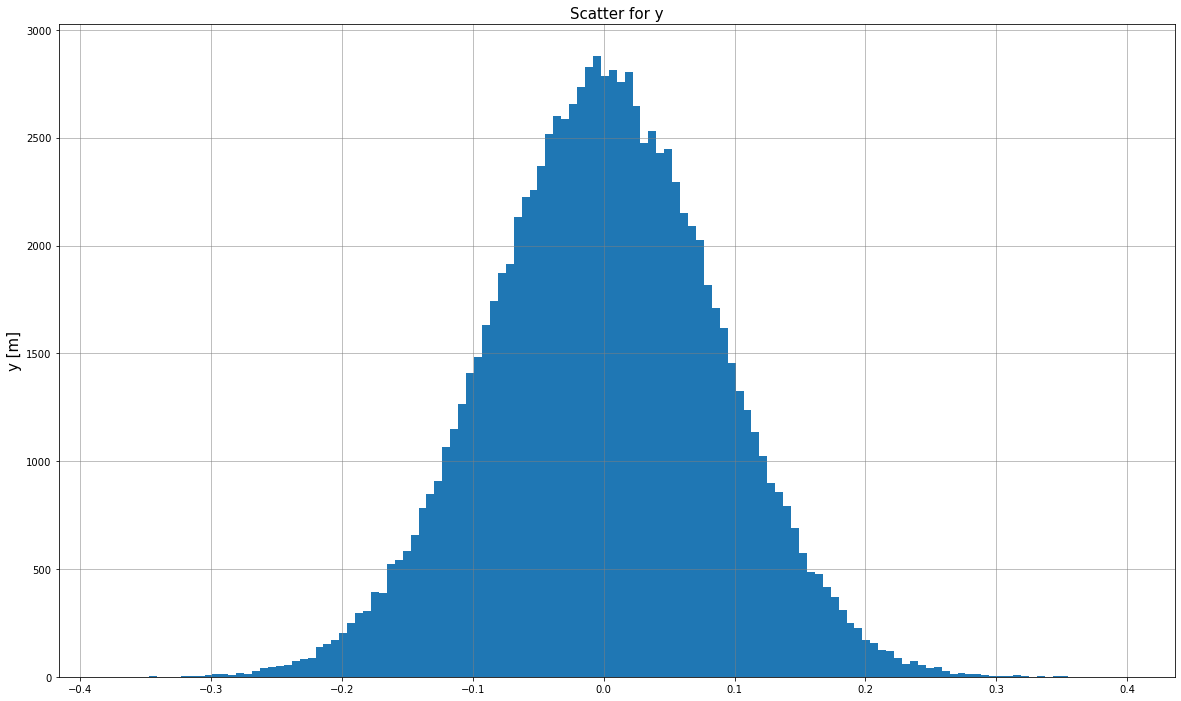

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PyParticleBunch import *
import matplotlib.pyplot as plt
import numpy as np

def enterFile(b, fileNum=0):
    NumFiles = Files.value
    if fileNum >= NumFiles:
        return

    beta_x = 3.215250830692
    beta_y = 18.598794417925
    alpha_x =  -0.547366008626
    alpha_y =  2.750780302852
    D_x =  -0.000103040524
    D_xp = 0.001254020379
    D_y = 0.
    D_yp = 0.
    emittance_x = emittance_y = 400 * 1E-6
    x_limit = 5
    y_limit = 5
    n = 1E5

    Matched_Gaussian_4D_bunch = ParticleBunch.MatchedGaussian_4D(n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y, x_limit = 5, y_limit = 5)

    def OnFileEntered(b):
        Button_Pressed = True
        Matched_Gaussian_4D_bunch.print_file(fileName.value)
        Bunch_In = ParticleBunch.from_file(fileName.value)
        x_data = Bunch_In.get_coordinate_array('x')
        y_data = Bunch_In.get_coordinate_array('y')
        xp_data = Bunch_In.get_coordinate_array('xp')
        yp_data = Bunch_In.get_coordinate_array('yp')
        t_data = Bunch_In.get_coordinate_array('t')
        pt_data = Bunch_In.get_coordinate_array('pt')

        def dropdown_type_eventhandler(change):
            common_filtering(change.new, dropdown_x_axis.value, dropdown_y_axis.value)
        def dropdown_x_axis_eventhandler(change):
            common_filtering(dropdown_type.value, change.new, dropdown_y_axis.value)
        def dropdown_y_axis_eventhandler(change):
            common_filtering(dropdown_type.value, dropdown_x_axis.value, change.new)

        output = widgets.Output()
        plot_output = widgets.Output()

        dropdown_type = widgets.Dropdown(options =['Default', 'Histogram', 'Scatter graph', 'Heatmap'], description='Graph_Type')
        dropdown_x_axis = widgets.Dropdown(options=['Default / ignore for histogram', 'x', 'y', 'xp', 'yp', 't', 'pt'], description='x_axis')
        dropdown_y_axis = widgets.Dropdown(options=['Default', 'x', 'y', 'xp', 'yp', 't', 'pt'], description='y_axis')


        def common_filtering(Graph_Type, x_axis, y_axis):
            if x_axis == 'x':
                x_axis_data = x_data
            if x_axis == 'xp':
                x_axis_data = xp_data
            if x_axis == 'y':
                x_axis_data = y_data
            if x_axis == 'yp':
                x_axis_data = yp_data
            if x_axis == 't':
                x_axis_data = t_data
            if x_axis == 'pt':
                x_axis_data = pt_data
            if y_axis == 'x':
                y_axis_data = x_data
            if y_axis == 'xp':
                y_axis_data = xp_data
            if y_axis == 'y':
                y_axis_data = y_data
            if y_axis == 'yp':
                y_axis_data = yp_data
            if y_axis == 't':
                y_axis_data = t_data
            if y_axis == 'pt':
                y_axis_data = pt_data

            if Graph_Type == 'Scatter graph':
                if y_axis == 'Default' or x_axis == 'Default / ignore for histogram':
                    print('Error message: You will need to select the coordinates type in order to plot this graph.')
                else:
                    print('To save your plot to file, please enter a name for the file: ')
                    button = widgets.Button(description="Save")
                    inp = widgets.Text(description='File name:')
                    Box = widgets.HBox([button,inp])

                    def on_button_clicked(b):
                        plot_file_name = inp.value
                        print(inp)
                        print('Thank you, ' + plot_file_name + '.png will be the name of your file.')

                        if x_axis and y_axis:
                            plt.rcParams["figure.figsize"] = (20,12)
                            plt.scatter(x_axis_data, y_axis_data);
                            plt.grid(linestyle='-', linewidth='0.5', color='grey')
                            plt.title('Scatter for ' + str(x_axis) + ' against ' + str(y_axis), fontsize=15)
                            u_label = 'placeholder'
                            v_label = 'placeholder'

                            plt.xlabel(u_label, fontsize=15)
                            plt.ylabel(v_label, fontsize=15)
                            plt.savefig(plot_file_name + '.png')
                            enterFile(b, fileNum + 1)
                        return inp.value

                    path = button.on_click(on_button_clicked)
                    display(Box)

            if Graph_Type == 'Histogram':
                if y_axis == 'Default':
                    print('Error message: To make a histogram you will need to change the y_axis coordinates.')
                else:
                    print('To save your plot to file, please enter a name for the file: ')
                    button = widgets.Button(description="Save")
                    inp = widgets.Text(description='File name:')
                    Box = widgets.HBox([button,inp])

                    def on_button_clicked(b):
                        plot_file_name = inp.value
                        print(inp)
                        print('Thank you, ' + plot_file_name + '.png will be the name of your file.')

                        plt.rcParams["figure.figsize"] = (20,12)
                        plt.hist(y_axis_data, bins=128);
                        plt.grid(linestyle='-', linewidth='0.5', color='grey')
                        plt.title('Scatter for ' + y_axis, fontsize=15)
                        if y_axis == 'x':
                            u_label = 'x [m]'
                        elif y_axis == 'xp':
                            u_label = 'xp [-]'
                        elif y_axis == 'y':
                            u_label = 'y [m]'
                        elif y_axis == 'yp':
                            u_label = 'yp [-]'
                        elif y_axis == 't':
                            u_label = 't [m]'
                        elif y_axis == 'pt':
                            u_label = 'pt [-]'
                        plt.ylabel(u_label, fontsize=15)
                        print(plot_file_name)
                        plt.savefig(plot_file_name + '.png')
                        
                        enterFile(b, fileNum + 1)
                        return inp.value

                    path = button.on_click(on_button_clicked)
                    display(Box)
                    
            if Graph_Type == 'Heatmap':
                if y_axis == 'Default' or x_axis == 'Default / ignore for histogram':
                    print('Error message: To make a histogram you will need to change the y_axis coordinates.')
                else:
                    print('To save your plot to file, please enter a name for the file: ')
                    button = widgets.Button(description="Save")
                    inp = widgets.Text(description='File name:')
                    Box = widgets.HBox([button,inp])

                    def on_button_clicked(b):
                        plot_file_name = inp.value
                        print(inp)
                        print('Thank you, ' + plot_file_name + '.png will be the name of your file.')

                        plt.rcParams["figure.figsize"] = (20,12)
                        plt.hist2d(x_axis_data, y_axis_data, bins=128);
                        plt.grid(linestyle='-', linewidth='0.5', color='grey')
                        plt.title('HeatMap for ' + y_axis, fontsize=15)
                        if y_axis == 'x':
                            u_label = 'x [m]'
                        elif y_axis == 'xp':
                            u_label = 'xp [-]'
                        elif y_axis == 'y':
                            u_label = 'y [m]'
                        elif y_axis == 'yp':
                            u_label = 'yp [-]'
                        elif y_axis == 't':
                            u_label = 't [m]'
                        elif y_axis == 'pt':
                            u_label = 'pt [-]'
                        plt.ylabel(u_label, fontsize=15)
                        print(plot_file_name)
                        plt.savefig(plot_file_name + '.png')
                        
                        enterFile(b, fileNum + 1)
                        return inp.value

                    path = button.on_click(on_button_clicked)
                    display(Box)

        dropdown_type.observe(dropdown_type_eventhandler, names='value')
        dropdown_x_axis.observe(dropdown_x_axis_eventhandler, names='value')
        dropdown_y_axis.observe(dropdown_y_axis_eventhandler, names='value')
        display(dropdown_type)
        display(dropdown_x_axis)
        display(dropdown_y_axis)

    button_Pressed = False
    fileName = widgets.Text(
        description = "Enter File Name")
    fileEnterBox = widgets.Button(
        description = 'Enter')
    display(fileName)
    display(fileEnterBox)
    fileEnterBox.on_click(OnFileEntered)



def generate_widget():
    global Files
    Files = widgets.BoundedIntText(
        min=1,
        max=10,
        description='Number of Files')

    display(Files)

    EnterBox = widgets.Button(
        description = 'Enter Number')
    display(EnterBox)
    EnterBox.on_click(enterFile)

generate_widget()
  

## Project 02: 

In [7]:
#import necessary widgets
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tfs

def save_button_eventhandler(change):
    #gets desired file name from user
    global FigName
    FigName = widgets.Text(description='enter a name to save figure')
    display(FigName)
    enterFigName = widgets.Button(description='enter')
    display(enterFigName)
    enterFigName.on_click(saveFig)

def saveFig(b):
    #saves final fig
    figName = FigName.value
    madx_tfs_plot_widget(keyword, s_value, y_value, input_tfs, True, figName)
    print('saved')
    
def add_to_plot():
    #(supposedly) adds plot to figure, but right now they just override one another
    global paramNum    
    madx_tfs_plot_widget(keyword, s_value, y_value, input_tfs, False)
    print('added to plot')
    paramNum += 1
    params_entered()
    
def generate_tfs_s_slider(df):
    tfs_s_slider = widgets.IntRangeSlider(
    value=[0, 16],
    min=np.min(df.S),
    max=np.max(df.S+10),
    step=5,
    description='S Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    )
    return tfs_s_slider

def generate_tfs_y_slider(df):
    tfs_y_slider = widgets.IntRangeSlider(
    value=[0, 50],
    min=-100,
    max=100,
    step=10,
    description='Y Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    )
    return tfs_y_slider
    
def madx_tfs_plot_widget(key, xlimits, ylimits, df, save_fig=False, figName=''):
    output = widgets.Output()
    plot_output = widgets.Output()
    output.clear_output()
    plot_output.clear_output()
    
    if key == 'BETX':
        ylab = r'$\beta_x$ [m]'
        col = 'b'
        ls = '-'
        lw = 1.5
    
    elif key == 'BETY':
        ylab = r'$\beta_y$ [m]'
        col = 'r'
        ls = '-'
        lw = 1.5     
        
    elif key == 'ALFX':
        ylab = r'$\alpha_x$ [-]'
        col = 'b'
        ls = '-'
        lw = 1.0
    
    elif key == 'ALFY':
        ylab = r'$\alpha_y$ [-]'
        col = 'r'
        ls = '-'
        lw = 1.0
    
    elif key == 'MUX':
        ylab = r'$\mu_x$ [-]'
        col = 'b'
        ls = '-'
        lw = 1.0
    
    elif key == 'MUY':
        ylab = r'$\mu_y$ [-]'
        col = 'r'
        ls = '-'
        lw = 1.0        
    
    elif key == 'DX':
        ylab = r'$D_x$ [m]'
        col = 'b'
        ls = '-'
        lw = 1.0
    
    elif key == 'DY':
        ylab = r'$D_y$ [m]'
        col = 'r'
        ls = '-'
        lw = 1.0    
        
    else:
        ylab = key
        col = 'k'
        ls = '-'
        lw = 1.0         
    
    with plot_output:
        
        fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(8.,4.), tight_layout=True)
        ax1 = fig1.add_subplot(111)        
        
        q1 = "{:.2f}".format(df.headers['Q1'])
        q2 = "{:.2f}".format(df.headers['Q2'])
        title = df.headers['SEQUENCE'] + ' Qx=' + str(q1) +  ' Qy=' + str(q2)
        ax1.set_title(title)
        
        ax1.set_xlabel('S [m]')
        ax1.set_ylabel(ylab)
        
        ax1.set_xlim(xlimits[0],xlimits[1])
        ax1.set_ylim(ylimits[0],ylimits[1])
        
        ax1.grid(ls=':', lw=0.5, color='grey')
        
        ax1.plot(df.S, df[key], ls=ls, lw=lw, color=col)
        plt.legend()
        plt.show()
        
        if save_fig:
            #fig1.savefig(str(key)+'_limits_'+str(xlimits[0])+'_'+str(xlimits[1])+'.png', dpi=200)
            fig1.savefig(figName+'.png', dpi=200)
    
def On_Enter_Keyword_Clicked(b):
    global keyword
    global tfs_y_slider
    keyword = dd_column.value
    if (paramNum == numParams) and (paramNum != 1): #checks if final fig should be generated
        save_button = widgets.Button(description="Save!")
        display(save_button)
        save_button.on_click(save_button_eventhandler)
    if paramNum > 1: #checks if tfs_s and tfs_y sliders need generating again
        add_to_plot()
        return
    #generates tfs_y slider (for first iteration)
    tfs_y_slider = generate_tfs_y_slider(input_tfs)
    display(tfs_y_slider)
    enterY = widgets.Button(
        description = 'Enter')
    display(enterY)
    enterY.on_click(On_Enter_Y_Clicked)

def On_Enter_Y_Clicked(b):
    global y_value
    global tfs_s_slider
    y_value = tfs_y_slider.value
    #read s value
    tfs_s_slider = generate_tfs_s_slider(input_tfs)
    display(tfs_s_slider)
    enterS = widgets.Button(
        description = 'Enter')
    display(enterS)
    enterS.on_click(On_Enter_S_Clicked)

def add_to_plot_handler(b): #add to plot button handler 
    add_to_plot()

def On_Enter_S_Clicked(b):
    global s_value
    global output
    global plot_output
    s_value = tfs_s_slider.value
    if paramNum == 1:
        save_button = widgets.Button(description="Save!")
        display(save_button)
        save_button.on_click(save_button_eventhandler)
    else:
        add_button = widgets.Button(description='add to plot')
        display(add_button)
        add_button.on_click(add_to_plot_handler)

def to_params(b): #handler function for entering parameters button
    params_entered()
    
def params_entered():
    global dd_column
    global input_tfs
    global numParams
    numParams = params.value
    if paramNum > numParams: #quit program once correct number of keywords generated
        return
    
    input_filename = fileName.value
    input_tfs = tfs.reader.read_tfs(input_filename)
    #read keyword
    dd_column = widgets.Dropdown(options = input_tfs.keys())
    display(dd_column)
    enterKeyword = widgets.Button(
        description = 'Enter')
    display(enterKeyword)
    enterKeyword.on_click(On_Enter_Keyword_Clicked)  
    
def On_Enter_File_Clicked(b):
    global params
    global paramNum
    paramNum = 1
    params = widgets.BoundedIntText(
        min=1,
        max=3,
        description='Number of parameters to plot')
    display(params)
    enterParams = widgets.Button(
        description = 'Enter')
    display(enterParams)
    enterParams.on_click(to_params)
    
def get_file():
    global fileName
    fileName = widgets.Text(
        description = "Enter File Name")
    EnterBox = widgets.Button(
        description = 'Enter')
    display(fileName)
    display(EnterBox)
    EnterBox.on_click(On_Enter_File_Clicked)
    #injection_bump_on.tfs

get_file()

Text(value='', description='Enter File Name')

Button(description='Enter', style=ButtonStyle())

BoundedIntText(value=1, description='Number of parameters to plot', max=3, min=1)

Button(description='Enter', style=ButtonStyle())

Dropdown(options=('KEYWORD', 'NAME', 'S', 'L', 'BETX', 'ALFX', 'MUX', 'BETY', 'ALFY', 'MUY', 'X', 'PX', 'Y', '…

Button(description='Enter', style=ButtonStyle())

IntRangeSlider(value=(0, 50), continuous_update=False, description='Y Range:', min=-100, step=10)

Button(description='Enter', style=ButtonStyle())

IntRangeSlider(value=(0, 16), continuous_update=False, description='S Range:', max=173, step=5)

Button(description='Enter', style=ButtonStyle())

Button(description='Save!', style=ButtonStyle())

Text(value='', description='enter a name to save figure')

Button(description='enter', style=ButtonStyle())

saved
